In [6]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [7]:
# use the last assignment data
ds = xr.open_dataset('RUNOFF_1998.nc', engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 150)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T10:30:00 ... 1998-12-16T10:30:00
  * lon        (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat        (lat) float64 -59.5 -58.5 -57.5 -56.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    ro         (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Nov 10 15:20:16 2020: cdo -s -f nc4 -z zip remap,grid_1...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [8]:
# calcualtion of the surface runoff
surface_runoff=ds.ro.mean(dim=['time'])
surface_runoff

<xarray.DataArray 'ro' (lat: 150, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 -59.5 -58.5 -57.5 -56.5 -55.5 ... 86.5 87.5 88.5 89.5

D:\anaconda\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
D:\anaconda\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


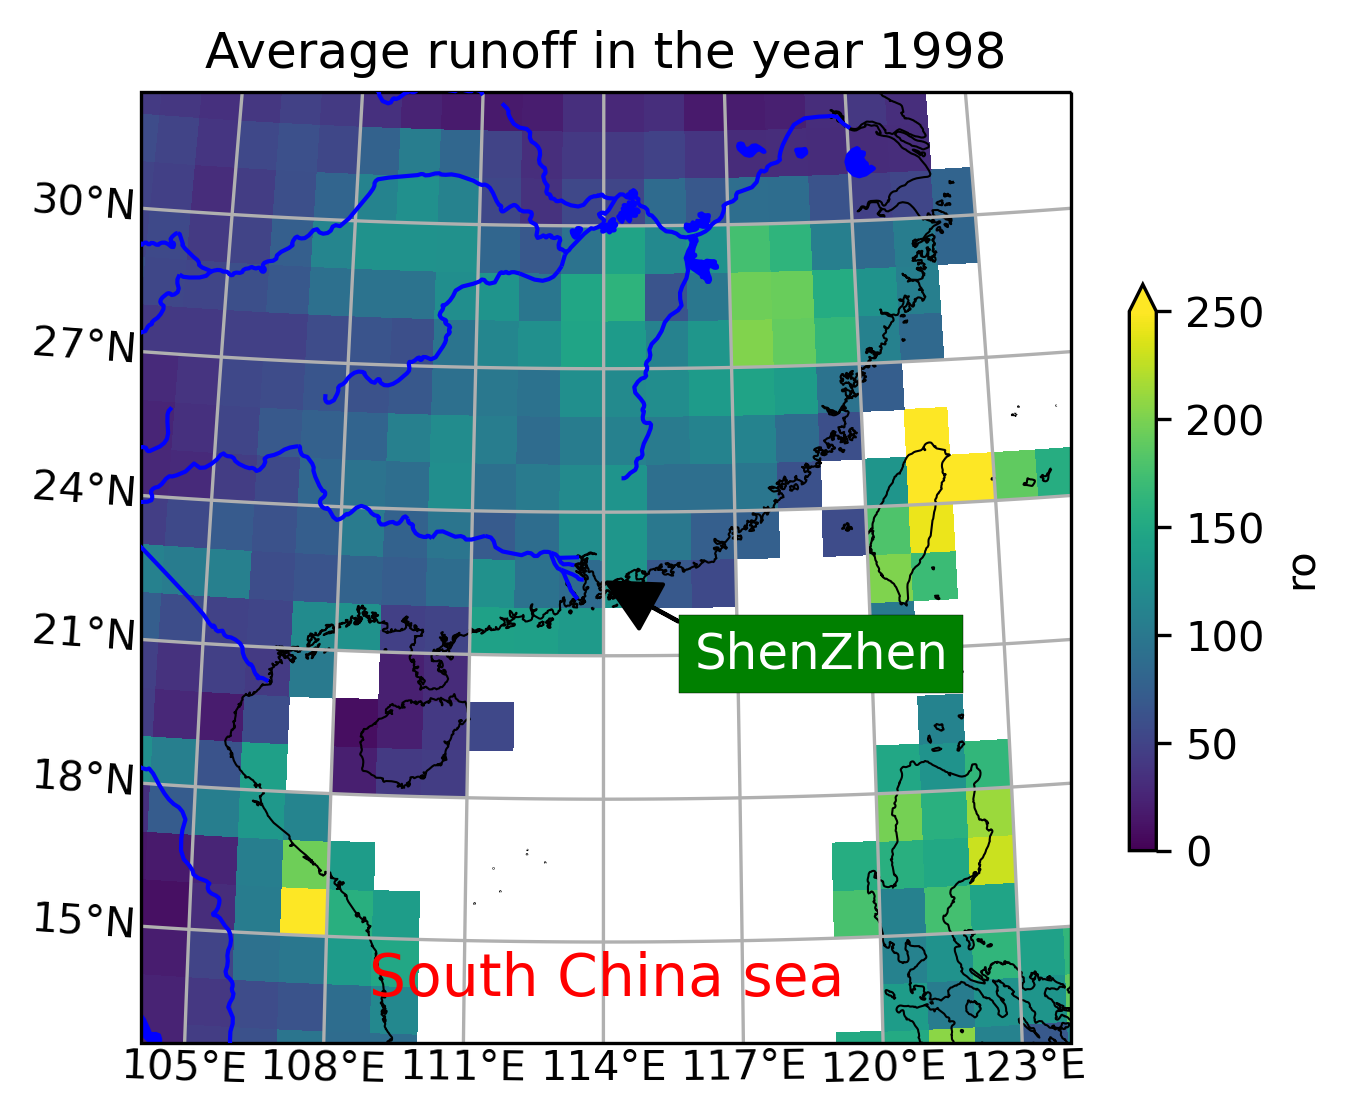

In [9]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=300)

# Set Orthographic projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen is the map center location
proj = ccrs.Orthographic(central_lon, central_lat) 
ax = plt.axes(projection=proj)
# set the map size 
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)
#plot the surface runoff 
surface_runoff.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=0, vmax=250, cbar_kwargs={'shrink': 0.5})
# make an anotation, plot Shenzhen in the map
plt.annotate('ShenZhen', xy=(central_lon, central_lat), xytext=(central_lon+500000, central_lat-200000),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
# add features, rivers and lakes
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)
plt.title("Average runoff in the year 1998")
# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
#plot the text, label the south China sea
plt.text(0.5, 0.05, "South China sea", transform=plt.gca().transAxes, 
         fontsize=14, ha='center', color='red')
#gridlines
gl=ax.gridlines(draw_labels=True)
gl.xlabels_top = False ##关闭上侧坐标显示
gl.ylabels_right = False ##关闭右侧坐标显示
plt.show()